In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns

TRAIN_DATA = '../input/train_folds.csv'

In [2]:
train = pd.read_csv(TRAIN_DATA)
#SHIFT+TAB to see function definition

In [4]:
train.head()

,time,signal,open_channels,ndrift_signal,denoised_signal,kfold
0,66.6278,-2.6553,0,-2.65530,-2.701713,0
1,77.0403,-2.8381,0,-2.83810,-2.753284,2
2,220.3546,3.1866,7,3.18660,3.330363,2
3,308.3939,1.2576,1,-1.25847,0.365779,0
4,187.2931,-1.3235,1,-1.32350,-0.098161,4


In [5]:
len(train)

5000000

<BarContainer object of 11 artists>

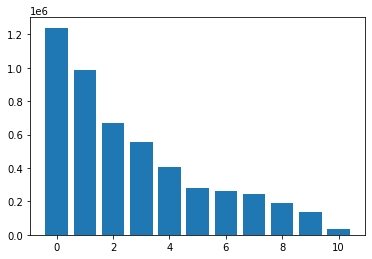

In [4]:
plt.bar(sorted(train.open_channels.unique()), train.open_channels.value_counts().values)

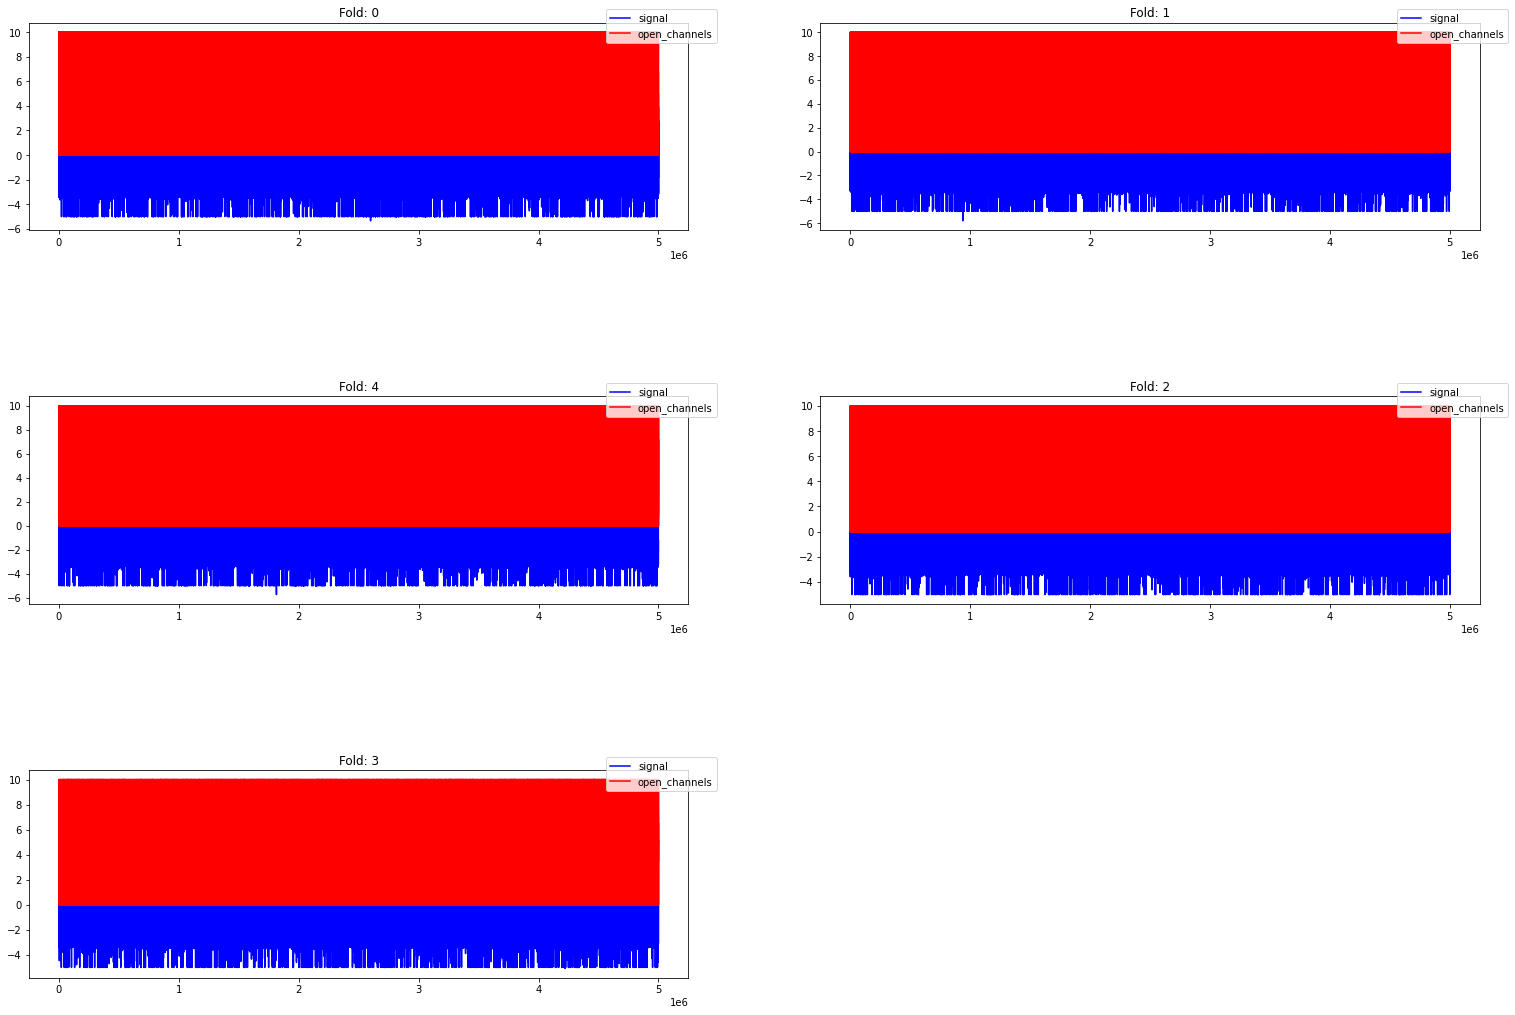

In [5]:
plt.figure(figsize=(26, 22))
plt.subplots_adjust(top=1.2, hspace = 0.8)
for i, b in enumerate(train['kfold'].unique()):
    plt.subplot(5, 2, i + 1)
    plt.plot(train.loc[train['kfold'] == b, ['signal']], color='b')
    plt.title(f'Fold: {b}')
    plt.plot(train.loc[train['kfold'] == b, ['open_channels']], color='r')
    plt.legend(['signal', 'open_channels'], loc=(0.875, 0.9))
    plt.grid(False)

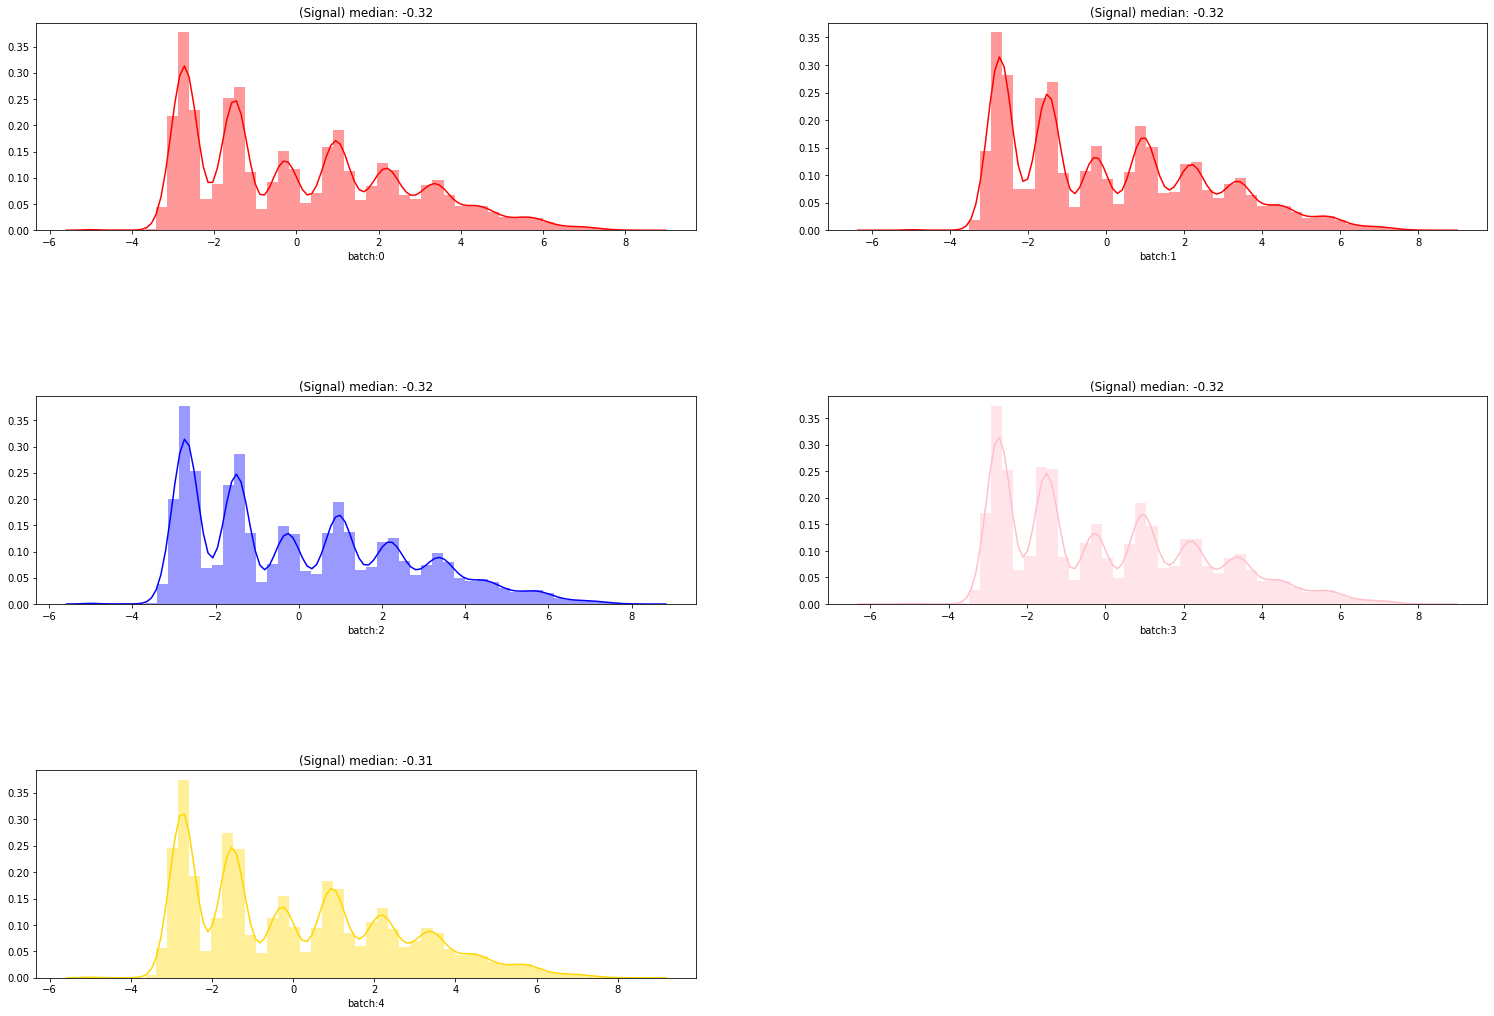

In [6]:

df = pd.DataFrame()
ROW_PER_BATCH = 500_000
plt.figure(figsize=(26, 22))
plt.subplots_adjust(top=1.2, hspace = 0.8)
colors = ['red','red','blue','pink','gold','brown','blue','pink','brown','gold']
for i in train['kfold'].unique():
    df[ f'batch:{i}' ] = train.iloc[i*ROW_PER_BATCH : (i+1)*ROW_PER_BATCH].reset_index().signal 
    plt.subplot(5, 2, i + 1)
    
    sns.distplot(df[f'batch:{i}'], color= colors[i]).set_title(f"(Signal) median: {df[f'batch:{i}'].median():.2f}")

In [7]:
train_df = pd.read_csv('../input/train_folds.csv')
test_df = pd.read_csv('../input/test.csv')

In [8]:
for fold in train_df.kfold.unique():
    train_df.loc[train_df['kfold']==fold, 'fold_mean'] = train_df.loc[train_df['kfold']==fold, 'signal'].mean()

In [9]:
train_df.loc[train_df['kfold']==fold, 'signal'].head()

5     2.355074
6    -2.779800
11   -2.661100
15    1.248500
24    1.142000
Name: signal, dtype: float64

In [10]:
train_df.head()

,time,signal,open_channels,kfold,fold_mean
0,350.8369,-0.421278,2,0,0.088382
1,44.7565,-2.670100,0,1,0.086585
2,139.7053,-1.898500,1,4,0.087573
3,203.1584,-0.744900,4,0,0.088382
4,466.9350,4.700799,8,2,0.087926


In [11]:
train_df.signal.describe()

count    5.000000e+06
mean     8.753131e-02
std      2.493801e+00
min     -5.796500e+00
25%     -2.100500e+00
50%     -3.156995e-01
75%      1.987500e+00
max      8.613100e+00
Name: signal, dtype: float64

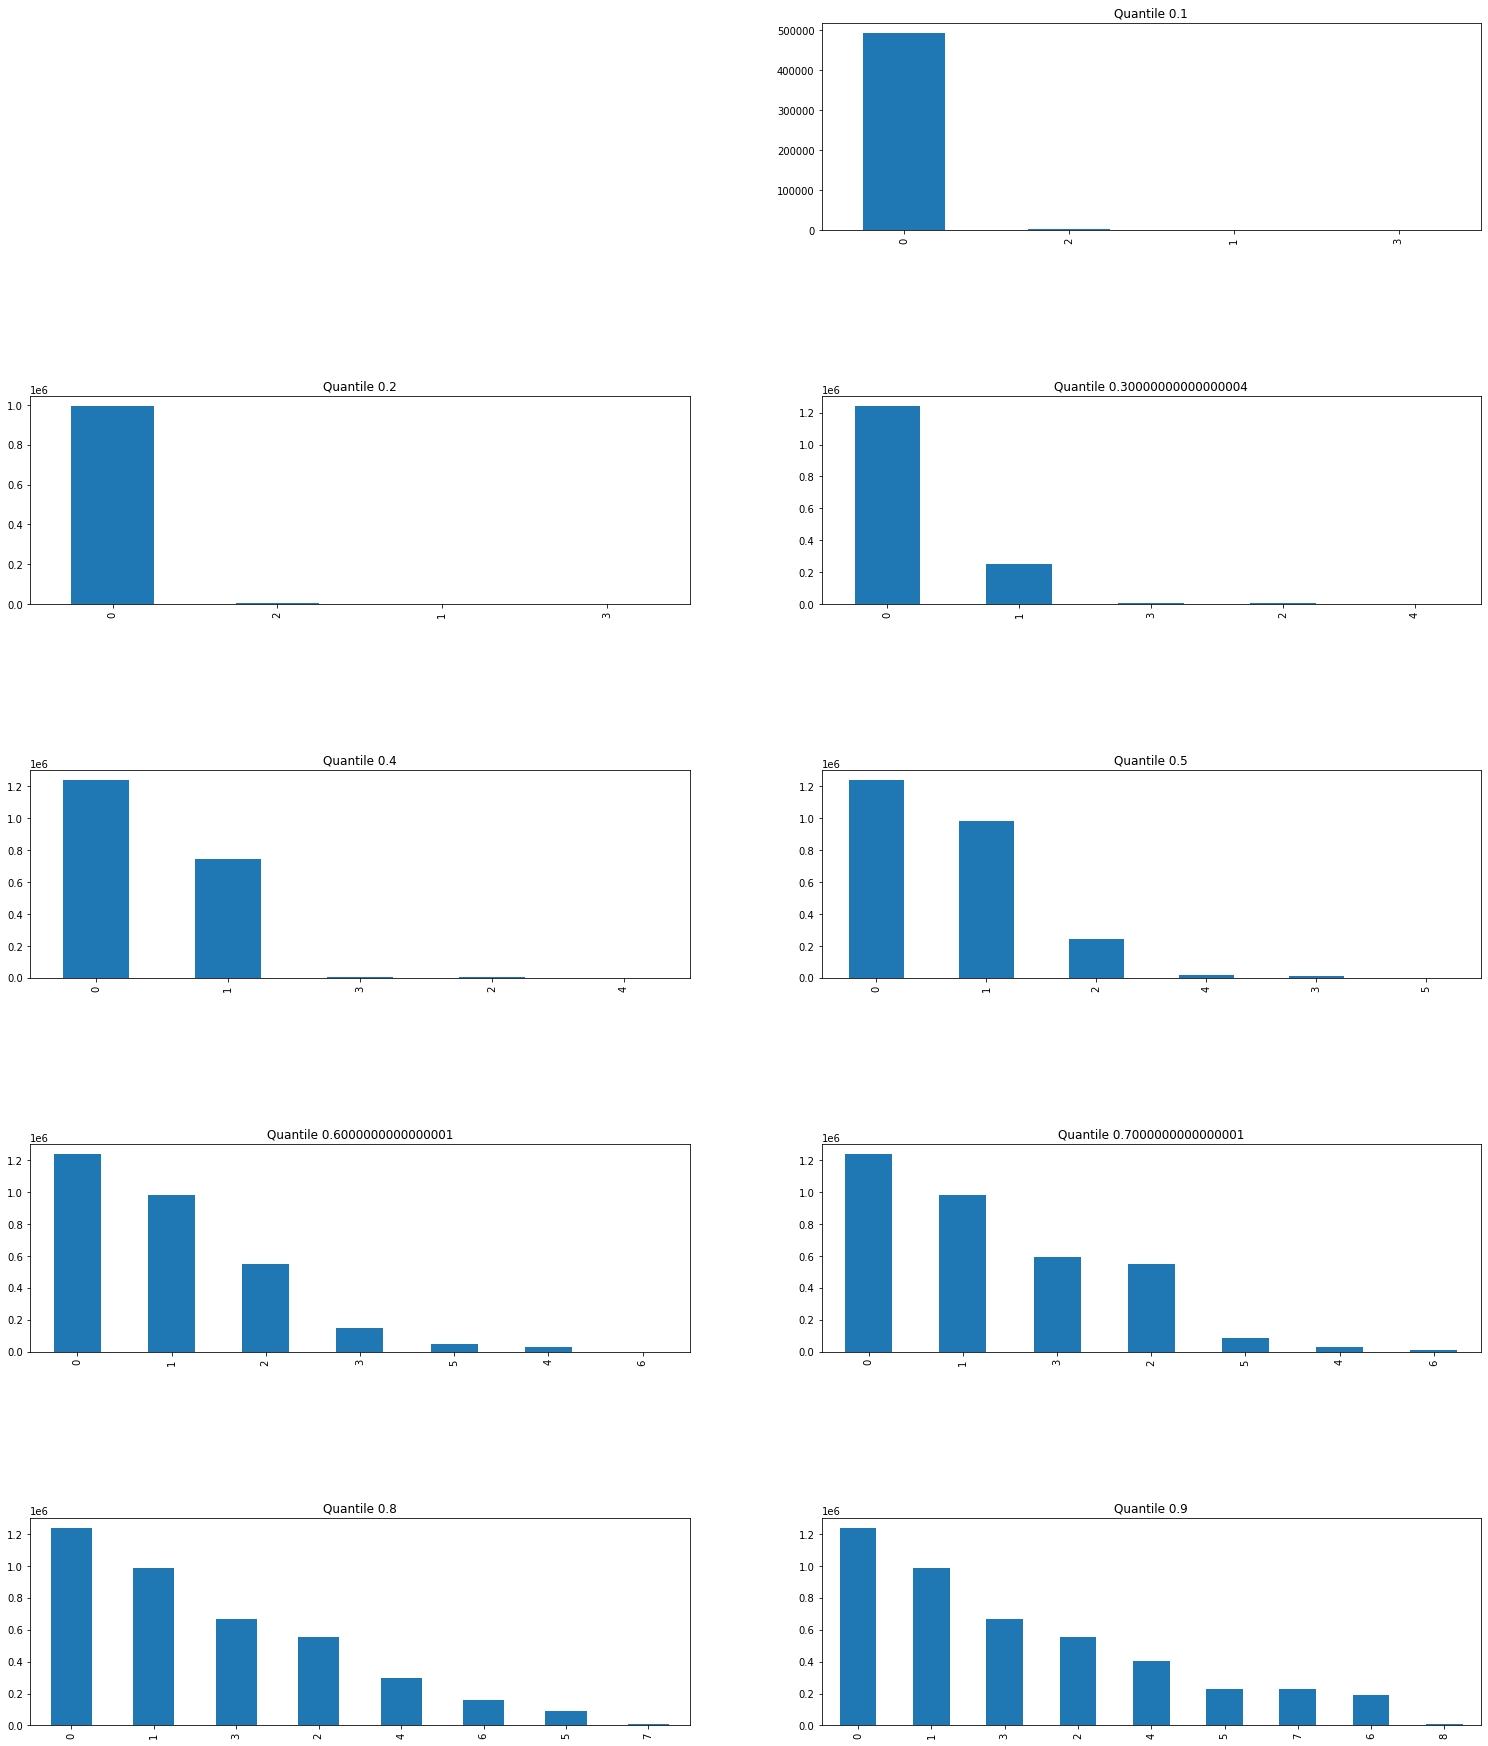

In [12]:
plt.figure(figsize=(26, 22))
plt.subplots_adjust(top=1.2, hspace = 0.8)

for i in [i*0.1 for i in range(1,10)]:
    plt.subplot(5,2,i*10+1).set_title(f'Quantile {i}')
    
    train_df[train_df['signal'] < np.quantile(train_df.signal, i)].open_channels.value_counts().plot.bar()
#     print(train_df[train_df['signal'] < np.quantile(train_df.signal, i)].open_channels.value_counts())

In [13]:
for i in [i*0.1 for i in range(1,10)]:
    print(f'Signals in {round(i,2)}-th signal quantile:')
    print(test_df[test_df['signal'] < np.quantile(test_df.signal, i)].signal.size)

Signals in 0.1-th signal quantile:
200000
Signals in 0.2-th signal quantile:
400000
Signals in 0.3-th signal quantile:
599971
Signals in 0.4-th signal quantile:
799902
Signals in 0.5-th signal quantile:
999969
Signals in 0.6-th signal quantile:
1200000
Signals in 0.7-th signal quantile:
1399990
Signals in 0.8-th signal quantile:
1599998
Signals in 0.9-th signal quantile:
1800000


In [14]:
train_df.head()

,time,signal,open_channels,kfold,fold_mean
0,350.8369,-0.421278,2,0,0.088382
1,44.7565,-2.670100,0,1,0.086585
2,139.7053,-1.898500,1,4,0.087573
3,203.1584,-0.744900,4,0,0.088382
4,466.9350,4.700799,8,2,0.087926


In [17]:
train_df.signal[train_df.signal<0]

0         -0.421278
1         -2.670100
2         -1.898500
3         -0.744900
6         -2.779800
             ...   
4999994   -1.372168
4999995   -3.038954
4999996   -1.420100
4999997   -1.797484
4999998   -0.369900
Name: signal, Length: 2724322, dtype: float64

In [6]:
import os

In [9]:
os.listdir('../models')

['.ipynb_checkpoints',
 'rFOCslow_0.pkl',
 'rFoth_1.pkl',
 'rFoth_2.pkl',
 'rFoth_3.pkl',
 'rFoth_4.pkl',
 'submission.csv']

In [11]:
import glob

In [12]:
glob?

Type:        module
String form: <module 'glob' from '/home/master/.conda/envs/ion/lib/python3.8/glob.py'>
File:        ~/.conda/envs/ion/lib/python3.8/glob.py
Docstring:   Filename globbing utility.


In [22]:
for i in range(5):
    file = glob.glob(f'../models/*{i}.pkl')[0]
    with open(file, 'rb+') as f:
        print(len(f.read()))

112479
79959
79959
79959
79959
